In [3]:
import os
import glob
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
proc_path = '../data/processed'

file_list = glob.glob(os.path.join(proc_path, 'lifelong_gan_log/*.csv'))
print(file_list)

['../data/processed/lifelong_gan_log/run-.-tag-loss_loss_D.csv', '../data/processed/lifelong_gan_log/run-.-tag-loss_loss_latent_L1.csv', '../data/processed/lifelong_gan_log/run-.-tag-model_P_fake_encoded.csv', '../data/processed/lifelong_gan_log/run-.-tag-loss_loss_GAN_G.csv', '../data/processed/lifelong_gan_log/run-.-tag-loss_loss_kl_E.csv', '../data/processed/lifelong_gan_log/run-.-tag-model_P_fake.csv', '../data/processed/lifelong_gan_log/run-.-tag-loss_loss.csv', '../data/processed/lifelong_gan_log/run-.-tag-loss_loss_vae_L1.csv', '../data/processed/lifelong_gan_log/run-.-tag-model_P_real.csv']


In [6]:
df_dict = {}
for ifile in file_list:
    df_key = ifile.split('/')[-1].split('-')[-1].split('.')[0]
    print('Getting: %s' %(df_key))
    df_dict[df_key] = pd.read_csv(ifile)

Getting: loss_loss_D
Getting: loss_loss_latent_L1
Getting: model_P_fake_encoded
Getting: loss_loss_GAN_G
Getting: loss_loss_kl_E
Getting: model_P_fake
Getting: loss_loss
Getting: loss_loss_vae_L1
Getting: model_P_real


In [9]:
df_dict['loss_loss'].head()

,Wall time,Step,Value
0,1.611343e+09,43,-1999.782837
1,1.611343e+09,168,-1596.276123
2,1.611343e+09,230,-1612.999146
3,1.611343e+09,475,-1913.005249
4,1.611343e+09,537,-2176.986816


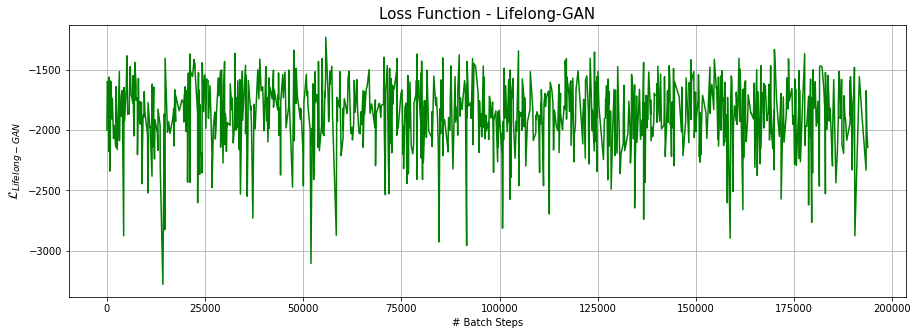

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(df_dict['loss_loss'].Step, df_dict['loss_loss'].Value, lw=1.5, color='green')
plt.title('Loss Function - Lifelong-GAN', fontsize=15)
plt.ylabel(r'$\mathcal{L}_{Lifelong-GAN}$', fontsize=13)
plt.xlabel(r'# Batch Steps')
plt.grid()
plt.savefig(os.path.join(proc_path, 'loss_gan.png'), dpi=300)

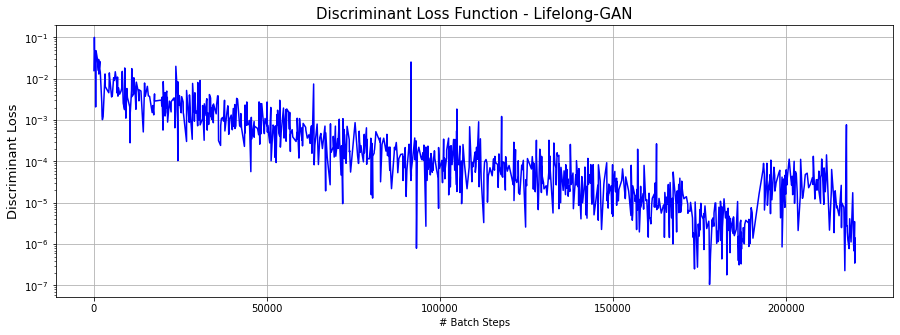

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(df_dict['loss_loss_D'].Step, df_dict['loss_loss_D'].Value, lw=1.5, color='blue')
plt.title('Discriminant Loss Function - Lifelong-GAN', fontsize=15)
plt.ylabel(r'Discriminant Loss', fontsize=13)
plt.xlabel(r'# Batch Steps')
plt.yscale('log')
plt.grid()
plt.savefig(os.path.join(proc_path, 'loss_D_gan.png'), dpi=300)

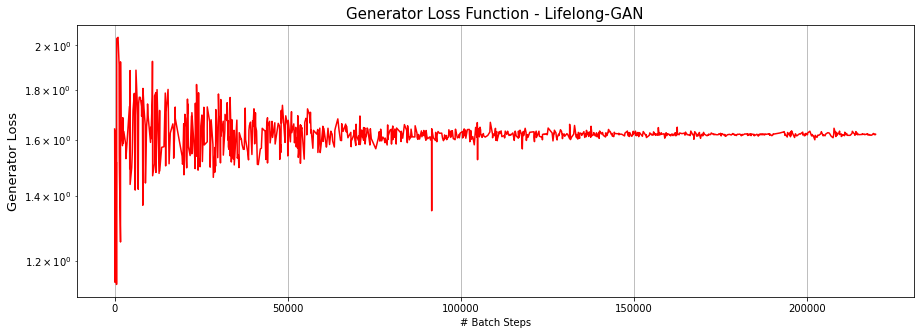

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(df_dict['loss_loss_GAN_G'].Step, df_dict['loss_loss_GAN_G'].Value, lw=1.5, color='red')
plt.title('Generator Loss Function - Lifelong-GAN', fontsize=15)
plt.ylabel(r'Generator Loss', fontsize=13)
plt.xlabel(r'# Batch Steps')
plt.yscale('log')
plt.grid()
plt.savefig(os.path.join(proc_path, 'loss_G_gan.png'), dpi=300)

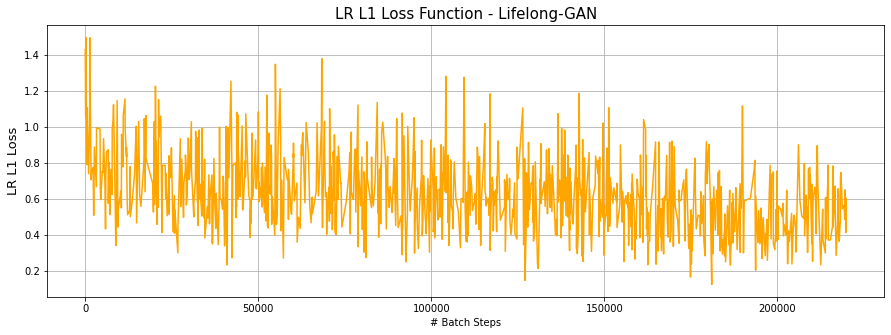

In [33]:
plt.figure(figsize=(15, 5))
plt.plot(df_dict['loss_loss_latent_L1'].Step, df_dict['loss_loss_latent_L1'].Value, lw=1.5, color='orange')
plt.title('LR L1 Loss Function - Lifelong-GAN', fontsize=15)
plt.ylabel(r'LR L1 Loss', fontsize=13)
plt.xlabel(r'# Batch Steps')
#plt.yscale('log')
plt.grid()
plt.savefig(os.path.join(proc_path, 'loss_lr_l1_gan.png'), dpi=300)

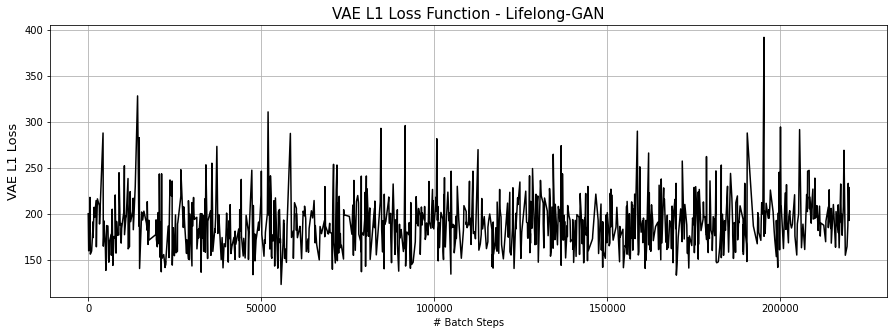

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(df_dict['loss_loss_vae_L1'].Step, df_dict['loss_loss_vae_L1'].Value, lw=1.5, color='black')
plt.title('VAE L1 Loss Function - Lifelong-GAN', fontsize=15)
plt.ylabel(r'VAE L1 Loss', fontsize=13)
plt.xlabel(r'# Batch Steps')
#plt.yscale('log')
plt.grid()
plt.savefig(os.path.join(proc_path, 'loss_vae_l1_gan.png'), dpi=300)

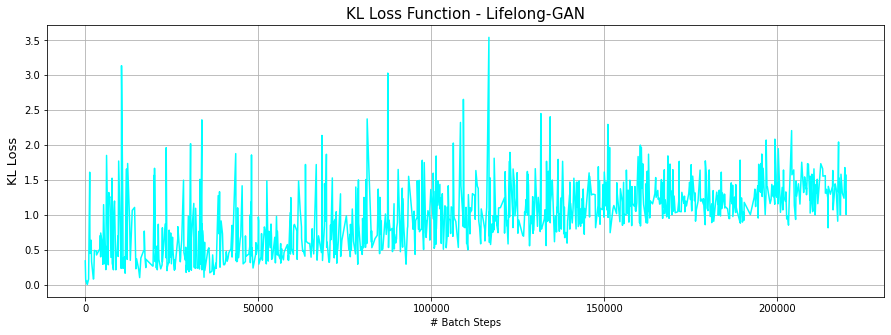

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(df_dict['loss_loss_kl_E'].Step, df_dict['loss_loss_kl_E'].Value, lw=1.5, color='cyan')
plt.title('KL Loss Function - Lifelong-GAN', fontsize=15)
plt.ylabel(r'KL Loss', fontsize=13)
plt.xlabel(r'# Batch Steps')
#plt.yscale('log')
plt.grid()
plt.savefig(os.path.join(proc_path, 'loss_kl_gan.png'), dpi=300)

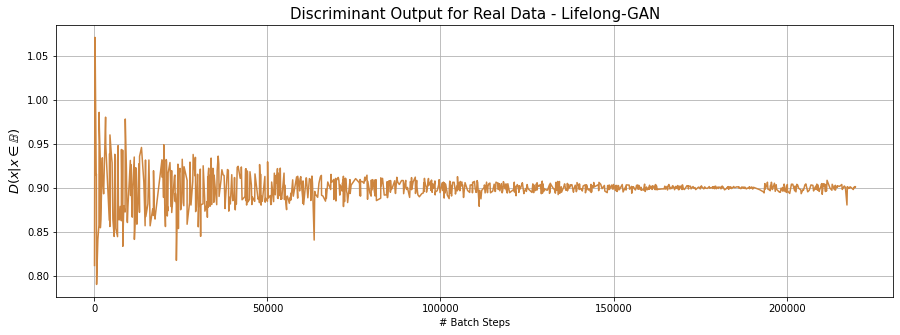

In [39]:
plt.figure(figsize=(15, 5))
plt.plot(df_dict['model_P_real'].Step, df_dict['model_P_real'].Value, lw=1.5, color='peru')
plt.title('Discriminant Output for Real Data - Lifelong-GAN', fontsize=15)
plt.ylabel(r'$D(x|x\in \mathbb{B})$', fontsize=13)
plt.xlabel(r'# Batch Steps')
#plt.yscale('log')
plt.grid()
plt.savefig(os.path.join(proc_path, 'p_real_gan.png'), dpi=300)

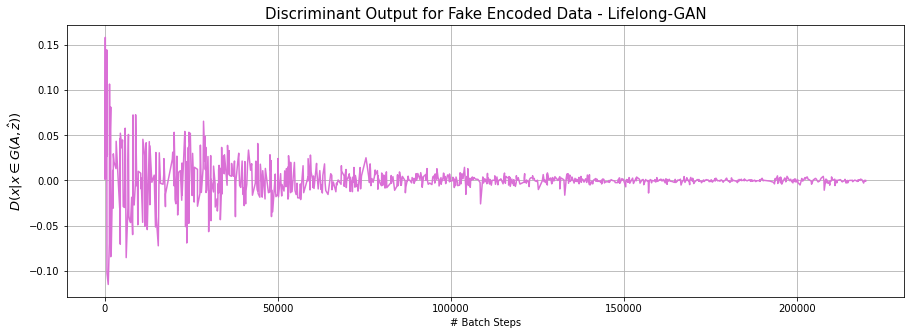

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(df_dict['model_P_fake'].Step, df_dict['model_P_fake'].Value, lw=1.5, color='orchid')
plt.title('Discriminant Output for Fake Encoded Data - Lifelong-GAN', fontsize=15)
plt.ylabel(r'$D(x|x \in G(A, \hat{z}))$', fontsize=13)
plt.xlabel(r'# Batch Steps')
#plt.yscale('log')
plt.grid()
plt.savefig(os.path.join(proc_path, 'p_fake_gan.png'), dpi=300)

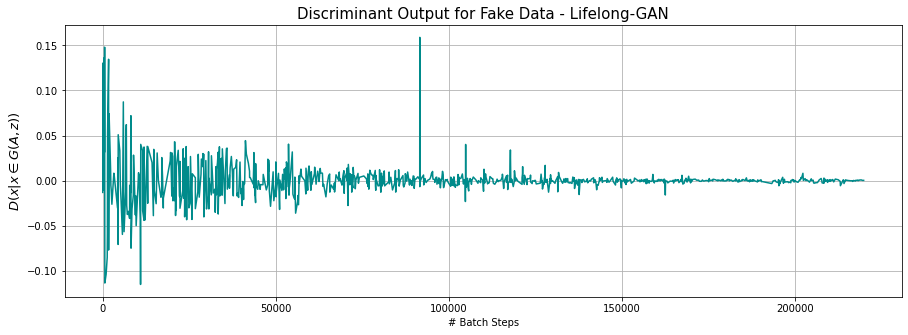

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(df_dict['model_P_fake_encoded'].Step, df_dict['model_P_fake_encoded'].Value, lw=1.5, color='darkcyan')
plt.title('Discriminant Output for Fake Data - Lifelong-GAN', fontsize=15)
plt.ylabel(r'$D(x|x \in G(A, z))$', fontsize=13)
plt.xlabel(r'# Batch Steps')
#plt.yscale('log')
plt.grid()
plt.savefig(os.path.join(proc_path, 'p_fake_encoded_gan.png'), dpi=300)